In [1]:
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
from lofo import LOFOImportance, Dataset, plot_importance

from lightgbm import LGBMClassifier, LGBMRegressor
 
%matplotlib inline

d:\Anaconda\envs\KerasTF\lib\site-packages\lofo\lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# import data
# data_df_1 = pd.read_csv("../../data/training_validation_1.csv")
data_df_2 = pd.read_csv("../../data/training_validation_2.csv")
# train_df = pd.concat([data_df_1, data_df_2], axis=0) # Merge data frames

In [3]:
# extract a sample of the data
sample_df = data_df_2.sample(frac=0.1, random_state=0)
# sample_df.sort_values("run", inplace=True)
del sample_df['run']

In [4]:
# define the validation scheme
cv = KFold(n_splits=4, shuffle=False, random_state=0)
# cv = StratifiedKFold(n_splits=4, shuffle=False, random_state=0, )

In [13]:
# define the binary target and the features
dataset = Dataset(df=sample_df, target="class", features=[col for col in sample_df.columns if col != 'class'])

In [14]:
model = LGBMClassifier()

In [15]:
# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, model=model, scoring="accuracy")

In [16]:
# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

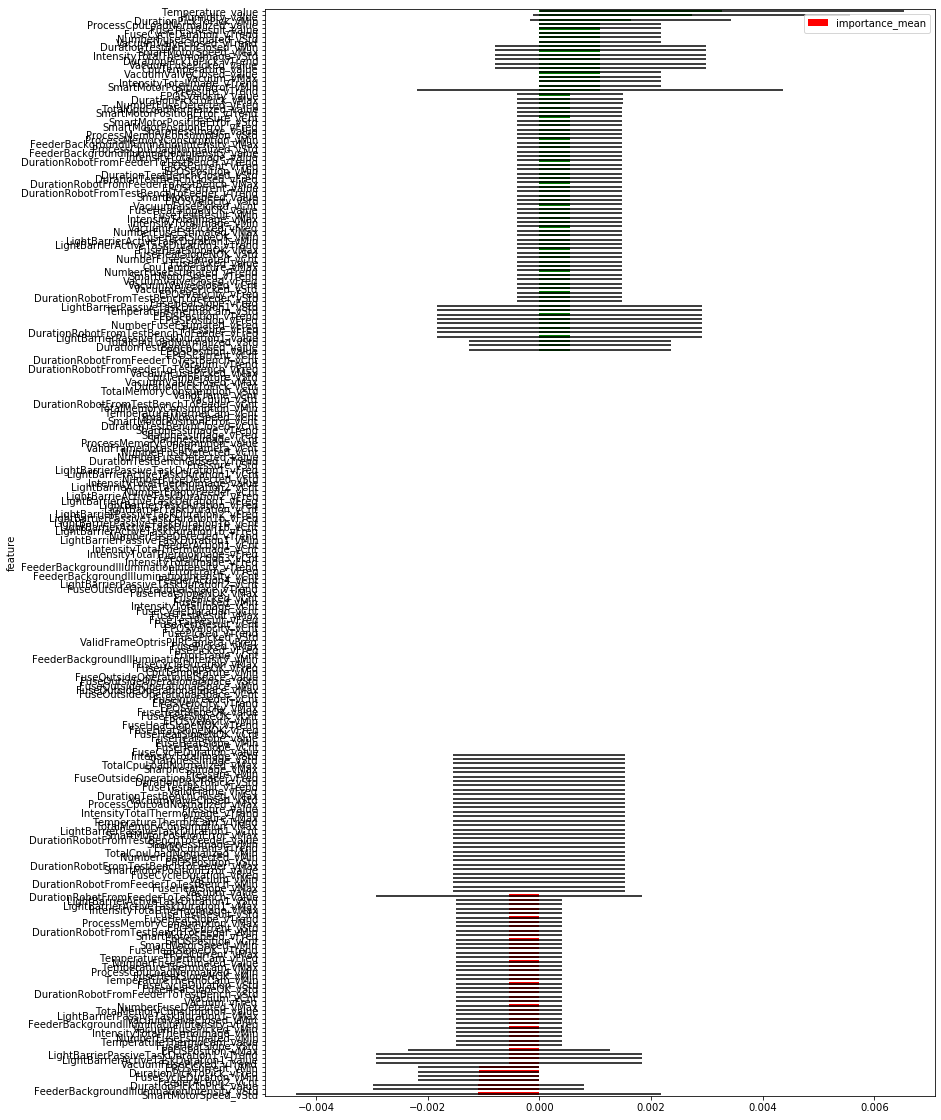

In [17]:
# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))

In [18]:
importance_df

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
206,Temperature_value,0.003269,0.003268,0.008715,0.002179,0.000000,0.002183
116,Humidity_value,0.002725,0.002834,0.004357,0.004357,-0.002183,0.004367
7,DurationPickToPick_vMin,0.001634,0.001806,0.002179,0.004357,0.000000,0.000000
180,ProcessCpuLoadNormalized_value,0.001091,0.001091,0.000000,0.002179,0.002183,0.000000
115,FuseTestResult_value,0.001091,0.001091,0.000000,0.002179,0.002183,0.000000
71,FuseCycleDuration_vTrend,0.001091,0.001091,0.000000,0.002179,0.002183,0.000000
167,NumberFuseEstimated_vStd,0.001091,0.001091,0.000000,0.002179,0.002183,0.000000
241,VacuumValveClosed_vTrend,0.001091,0.001091,0.000000,0.002179,0.000000,0.002183
3,CpuTemperature_value,0.001089,0.001887,0.000000,0.004357,0.000000,0.000000
9,DurationPickToPick_vTrend,0.001089,0.001887,0.000000,0.004357,0.000000,0.000000
